In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
import math

In [35]:
mu = 100000
sigma =20000 
dist1 = np.random.normal(mu, sigma, 1000)

In [36]:
mu = 140000
sigma =20000 
dist2 = np.random.normal(mu, sigma, 1000)

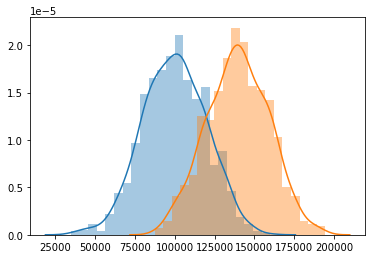

In [37]:
sns.distplot(dist1)
sns.distplot(dist2)

In [38]:
dist1_s = dist1.reshape((-1,1))

In [39]:
dist2_s = dist2.reshape((-1,1))

In [40]:
df = pd.DataFrame(dist1)
df['tireline'] = 'D1'
df = df.sort_values(by  = [0])

df2 = pd.DataFrame(dist2)
df2['tireline'] = 'D2'
df2 = df2.sort_values(by  = [0])

df3 = pd.concat([df, df2], axis = 0)
df3 = df3.sort_values(by = [0])
dist3 = np.asarray(df3[0])
dist3_s = dist3.reshape((-1,1))

In [41]:
scaler = preprocessing.StandardScaler()
scaler = preprocessing.MaxAbsScaler()

train = dist3_s
scaler = scaler.fit(train)

In [42]:
df3['NORMED_VALS'] = list(scaler.fit_transform(dist3_s).flatten())
df3['NORMED_VALS'] = df3['NORMED_VALS'] *10

In [43]:
# Performance of tireline on 1-10 scale
df3.groupby(['tireline'])['NORMED_VALS'].mean()

tireline
D1    5.133907
D2    7.177499
Name: NORMED_VALS, dtype: float64

In [44]:
#confidence interval
std = df3.groupby(['tireline'])['NORMED_VALS'].std()
count = df3.groupby(['tireline'])['NORMED_VALS'].count()
std2 = std.div(np.asarray([math.sqrt(x) for x in  np.asarray(np.round(count/4))]))
std2

tireline
D1    0.064306
D2    0.063222
dtype: float64

In [ ]:
# scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MaxAbsScaler()
# # scaler = preprocessing.RobustScaler()
# # scaler = preprocessing.Normalizer()
# # scaler = preprocessing.quantile_transform(dist2_s)
# # scaler = preprocessing.maxabs_scale()


# train = dist2_s
# scaler = scaler.fit(train)

# test = dist1_s
# print('DIST1: ',scaler.fit_transform(test).flatten().min(), scaler.fit_transform(test).flatten().max())
# test = dist2_s
# print('DIST2: ',scaler.fit_transform(test).flatten().min(), scaler.fit_transform(test).flatten().max())